# Advertising Products Based on Gender at POS

<ol>
    <li>
        <h2>Background</h2>
        <p>
            Early on, humans learn to distinguish one shape from another in such a way that it feels like we
were born with this ability. When we try to mimic this human capability using our 0-1 marvel
(machines), only then we realize the complexity of this and are left with nothing but awe for the
human brain. Machine learning in layman terms is machines imitating and adapting human like
behavior. The human like behavior that is expected of the machine is to ‘learn from experience’.
Image classification has become one of the key pilot use-cases for demonstrating machine
learning. It involves the extraction of information from an image and then associating the extracted
information to one or more class labels. Image classification within the machine learning domain
can be approached as a supervised learning task. Here, in this project we aim to use images of
humans and classify them based on gender (male or female). This classification is then further fed
to a function which will then choose product adverts targeting the end consumer. This ensures that
the target consumer is made aware of the product which in turn will increase the sales bringing in
revenue.
        </p>
    </li>
    <li>
        <h2>Business problem</h2>
        <p>
            To increase the sales revenue, we need to devise a smart marketing strategy. Our aim is to
advertise our products in such a way that the target consumer is made aware of our products. At
the sales counter, we predict the gender of the person and display relevant products on the screen
behind the counter at the store.
        </p>
    </li>
    <li>
        <h2>Target Audience</h2>
        <p>
            Customers who walk in to the store.
        </p>
    </li>
</ol>

#### Download the required library

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob
import pickle
import cvlib as cv
from time import sleep

## Section2) Explain your dataset, how it is composed, and how you collected it

Dataset collection method<br>
1.Since our aim is to train a model so that it can detect the human as male or female, and it require both male and female images, we downloaded the images of indian movie actors, since they are easily available in the internet.

## Data composition
FolderStructure
* 1.gender_dataset_face/woman
* 2.gender_dataset_face/man

In CreateDataset function,<br><br> 
1.The function takes each image in the folder i.Woman and ii.Man and resize it to the desired dimensions(96 X 96) as per our function.<br>
2.After that it will convert the image into image array and saves the image array into data(which is a list).<br>
3.Here we are labelling the data based on folder name, first we are saving the path into a string and splitting the path and getting the folder names, it gives us the label and saving the labels and saving the labels into labels(which is a list).
<br><br>
The dataset will be stored as pickle file("arbooj_week10_data.pkl")

In [2]:
# initialize the parameters
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

Create Dataset Function

In [3]:
def createDataset():
    
    # initialize the parameters
    dataset=[]
    data = []
    data1=[]
    labels = []
    raw_images=[]
    
    # load image files from the dataset
    curr_dict = os.getcwd()
    image_files = [f for f in glob.glob(curr_dict+r'\gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]
    random.shuffle(image_files)
    
    # converting images to arrays and labelling the categories
    for img in image_files:
        image = cv2.imread(img)
        image = cv2.resize(image, (img_dims[0],img_dims[1]))
        raw_images.append(image)
        image = img_to_array(image)
        data.append(image)
        label = img.split(os.path.sep)[-2] 
        if label == "woman":
            label = 1
        else:
            label = 0    
        data1.append([image,label])
        labels.append([label]) # [[1], [0], [0], ...]
        dataset=[data,labels,raw_images,data1]
    
    return dataset

To create the dataset as a pickle file we are calling createDataset Function

In [4]:
#create a pickle file to export the dataset
pickleOut = open('arbooj_week10_data.pkl','wb')
#calling the function
pickle.dump(createDataset(),pickleOut)
pickleOut.close()

## Section 3) Load of the data set
We are loading the dataset genderDetectionData

In [5]:
pickleIn = open('arbooj_week10_data.pkl','rb')
genderDetectionData=pickle.load(pickleIn)

In [6]:
print(len(genderDetectionData))
print(type(genderDetectionData))

4
<class 'list'>


In [7]:
#Unpacking the genderDetectionData which is a list
images_data,data_Label,raw_images,data_label=genderDetectionData
data=images_data
labels=data_Label

## Section 4) Show me your data!!!!!!!

In [8]:
print(images_data[0].shape)
print(type(raw_images))

(96, 96, 3)
<class 'list'>


#### Displaying the top 10 images

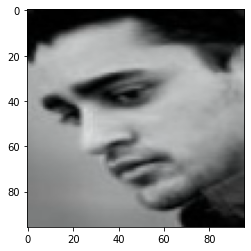

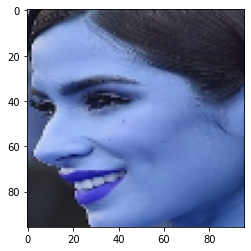

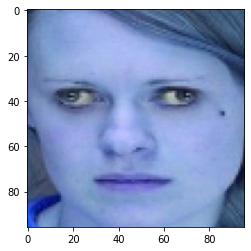

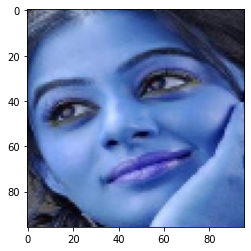

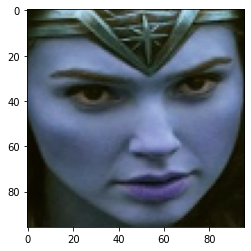

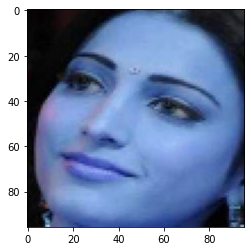

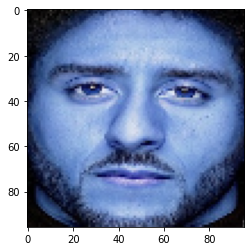

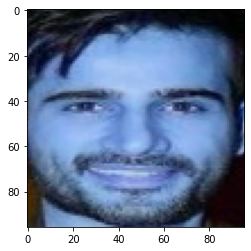

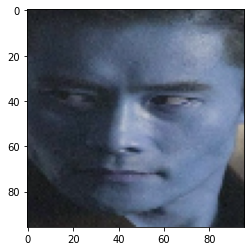

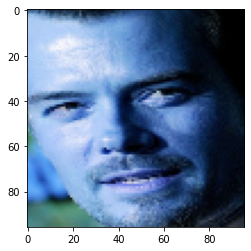

In [9]:
for each in raw_images[:10]:
    plt.imshow(each,cmap='gray')
    plt.show()

#### Pre-Processing the Data

In [10]:
data = np.array(images_data, dtype="float") / 255.0
labels = np.array(data_Label)

#### Length of the data

In [11]:
print(len(images_data),len(data_Label))

2307 2307


#### Some insights about data

In [12]:
print(type(data),type(labels))
print(data)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[[[0.11764706 0.11764706 0.11764706]
   [0.09019608 0.09019608 0.09019608]
   [0.06666667 0.06666667 0.06666667]
   ...
   [0.10980392 0.10980392 0.10980392]
   [0.11764706 0.11764706 0.11764706]
   [0.11764706 0.11764706 0.11764706]]

  [[0.0627451  0.0627451  0.0627451 ]
   [0.05098039 0.05098039 0.05098039]
   [0.04313725 0.04313725 0.04313725]
   ...
   [0.09019608 0.09019608 0.09019608]
   [0.11764706 0.11764706 0.11764706]
   [0.12941176 0.12941176 0.12941176]]

  [[0.01960784 0.01960784 0.01960784]
   [0.01568627 0.01568627 0.01568627]
   [0.01960784 0.01960784 0.01960784]
   ...
   [0.05098039 0.05098039 0.05098039]
   [0.09019608 0.09019608 0.09019608]
   [0.11372549 0.11372549 0.11372549]]

  ...

  [[0.48235294 0.49019608 0.49019608]
   [0.48235294 0.49019608 0.49019608]
   [0.47843137 0.48627451 0.48627451]
   ...
   [0.01960784 0.01960784 0.01960784]
   [0.01176471 0.01176471 0.01176471]
   [0.01568627 0.01568627 0.01568627]

#### Split dataset to training and testing
The dataset is splitted into 80% train dataset and 20% test dataset

In [13]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,random_state=42)

In [14]:
trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

### Augmenting datset 
We augment the dataset by making minor changes in the original feature of the dataset.
This helps in increasing the data required.

In [15]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

## Show the code and architecutre of your ML

#### Define the model

In [16]:
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

#### Build the model

In [17]:
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

#### Compile the model

In [18]:
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

#### Train the model

In [19]:
H = model.fit(aug.flow(trainX, trainY, batch_size=batch_size),validation_data=(testX,testY),steps_per_epoch=len(trainX) // batch_size,epochs=epochs, verbose=1)

Epoch 1/100
28/28 [==============================] - 58s 2s/step - loss: 0.7839 - accuracy: 0.7209 - val_loss: 0.6933 - val_accuracy: 0.5390
Epoch 2/100
28/28 [==============================] - 43s 2s/step - loss: 0.4457 - accuracy: 0.8220 - val_loss: 0.9351 - val_accuracy: 0.5390
Epoch 3/100
28/28 [==============================] - 45s 2s/step - loss: 0.3971 - accuracy: 0.8473 - val_loss: 0.7160 - val_accuracy: 0.5390
Epoch 4/100
28/28 [==============================] - 44s 2s/step - loss: 0.3420 - accuracy: 0.8705 - val_loss: 0.9773 - val_accuracy: 0.5390
Epoch 5/100
28/28 [==============================] - 46s 2s/step - loss: 0.3082 - accuracy: 0.8838 - val_loss: 1.7670 - val_accuracy: 0.5390
Epoch 6/100
28/28 [==============================] - 45s 2s/step - loss: 0.3058 - accuracy: 0.8821 - val_loss: 0.9835 - val_accuracy: 0.5390
Epoch 7/100
28/28 [==============================] - 45s 2s/step - loss: 0.2902 - accuracy: 0.8911 - val_loss: 1.6724 - val_accuracy: 0.5390
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 41s 1s/step - loss: 0.0524 - accuracy: 0.9770 - val_loss: 0.0983 - val_accuracy: 0.9632
Epoch 60/100
28/28 [==============================] - 41s 1s/step - loss: 0.0577 - accuracy: 0.9759 - val_loss: 0.1003 - val_accuracy: 0.9740
Epoch 61/100
28/28 [==============================] - 41s 1s/step - loss: 0.0586 - accuracy: 0.9787 - val_loss: 0.1630 - val_accuracy: 0.9589
Epoch 62/100
28/28 [==============================] - 41s 1s/step - loss: 0.0529 - accuracy: 0.9809 - val_loss: 0.1467 - val_accuracy: 0.9524
Epoch 63/100
28/28 [==============================] - 41s 1s/step - loss: 0.0530 - accuracy: 0.9809 - val_loss: 0.1867 - val_accuracy: 0.9416
Epoch 64/100
28/28 [==============================] - 41s 1s/step - loss: 0.0578 - accuracy: 0.9753 - val_loss: 0.7481 - val_accuracy: 0.8074
Epoch 65/100
28/28 [==============================] - 41s 1s/step - loss: 0.0458 - accuracy: 0.9803 - val_loss: 0.3685 - val_accuracy: 0.8810
Epoch 

## Save your ML model for distribution

In [20]:
model.save('arbooj_week11_model.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: gender_detection_active.model\assets


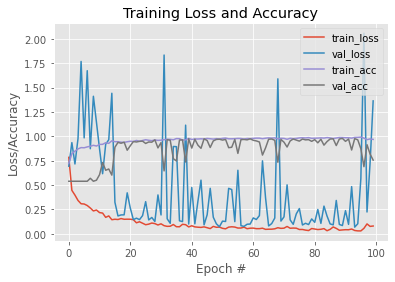

In [21]:
# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

#### Load the saved model

In [22]:
model = keras.models.load_model('arbooj_week11_model.model')

## Inference test of your model

### Show the advertisement based on the gender
Function Name: ShowAd
<br>Input        : the gender of the person on webcam
<br>Output       : display the products based on gender given as input to the function

In [28]:
def ShowAd(gender):
    plt.rcParams["axes.grid"] = False
    print(gender)
    img_dims1 = (150,150,3)
    cur_dir = os.getcwd()
    if gender.lower() == "woman":
        image_files1 = [f for f in glob.glob(cur_dir+r'\Advertisement\woman' + "/*", recursive=True) if not os.path.isdir(f)]
    else:
        image_files1 = [f for f in glob.glob(cur_dir+r'\Advertisement\man' + "/*", recursive=True) if not os.path.isdir(f)]
    random.shuffle(image_files1)
    
    
    for img in image_files1:
        image = cv2.imread(img)
        image = cv2.resize(image, (img_dims1[0],img_dims1[1]))
        #raw_images.append(image)
        plt.imshow(image,cmap='gray')
        plt.show()
        #sleep(2)


In [29]:
# open webcam
webcam = cv2.VideoCapture(0)

woman


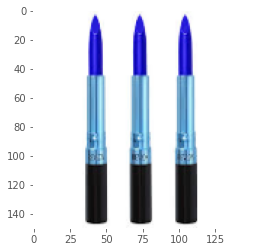

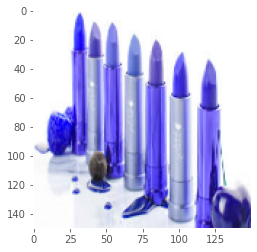

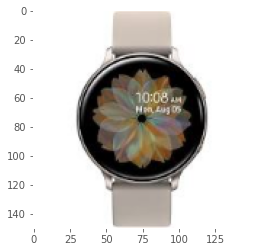

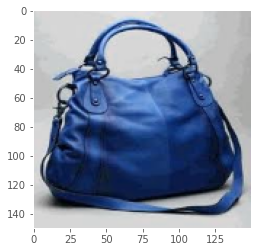

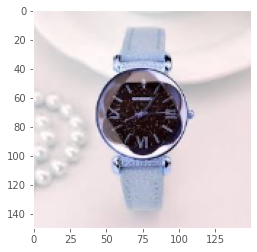

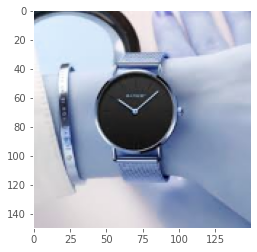

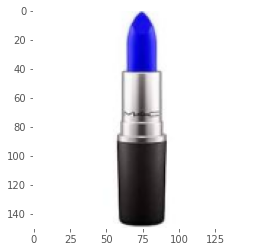

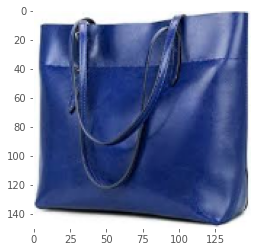

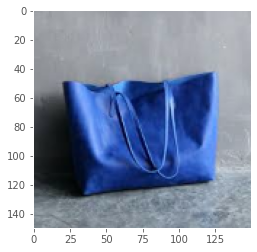

woman


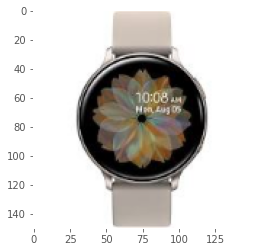

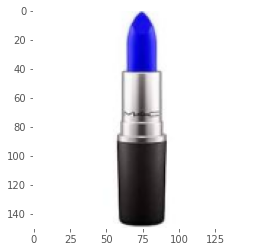

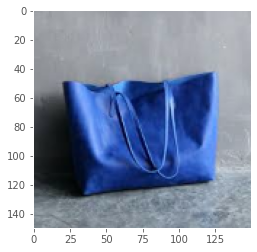

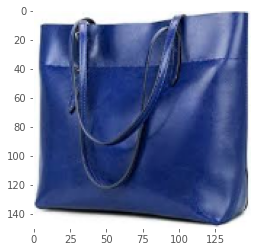

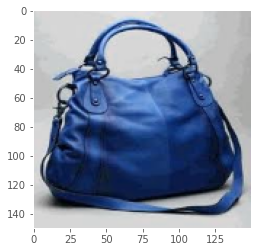

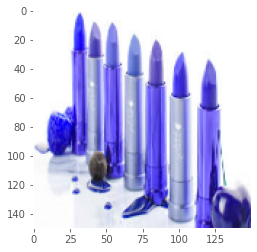

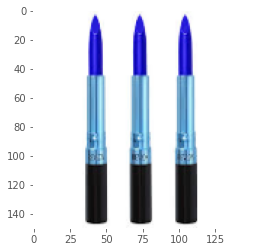

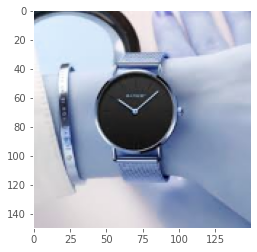

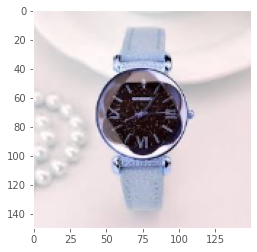

woman


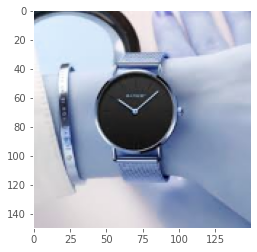

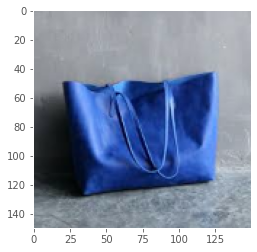

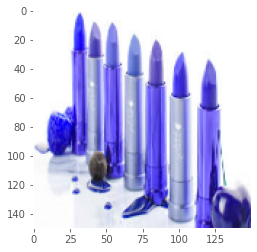

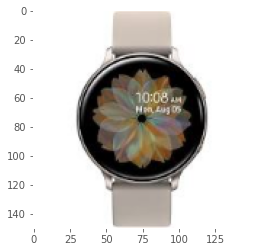

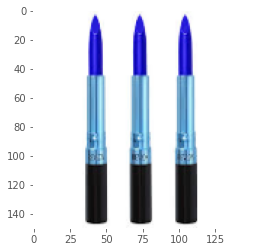

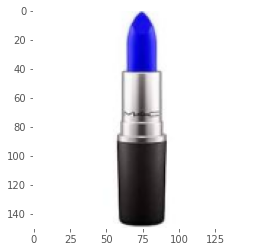

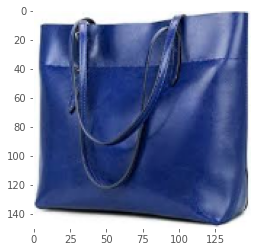

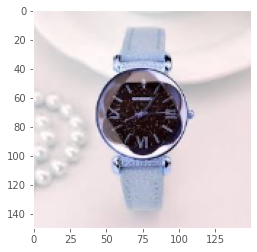

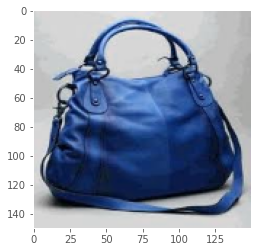

woman


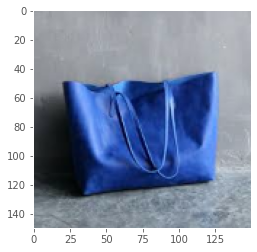

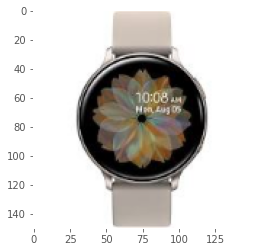

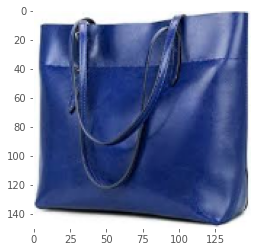

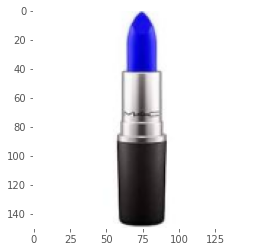

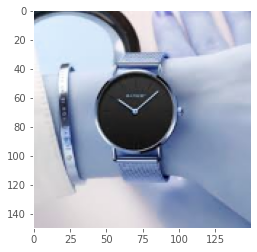

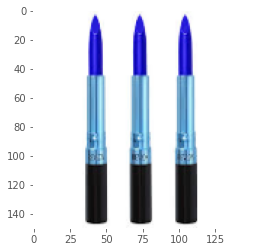

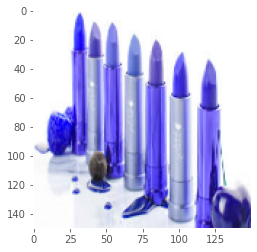

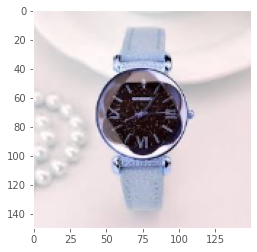

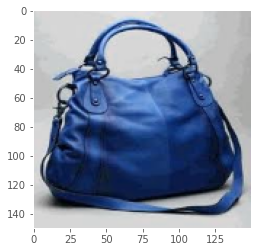

woman


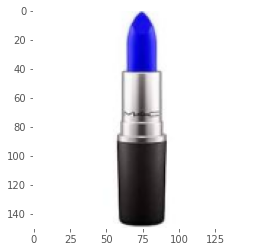

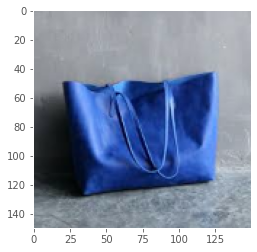

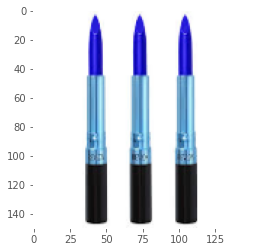

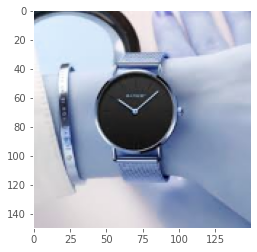

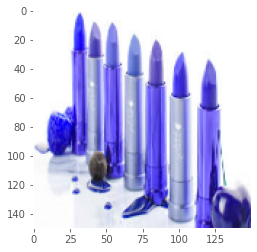

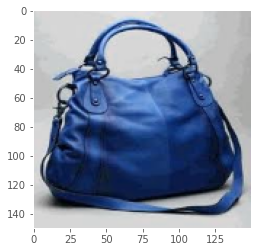

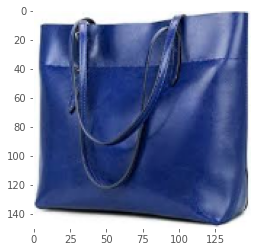

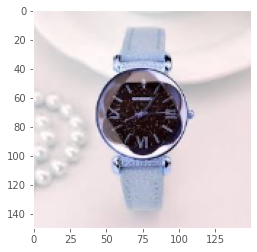

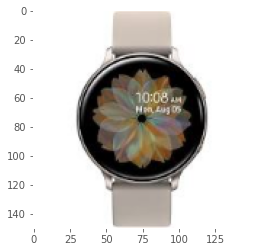

woman


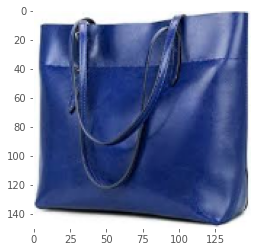

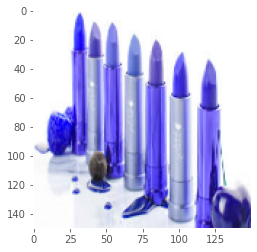

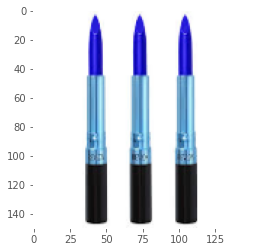

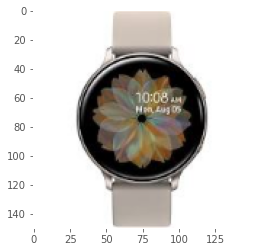

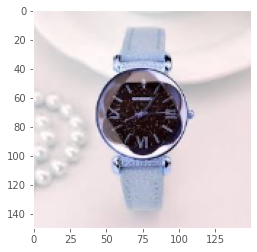

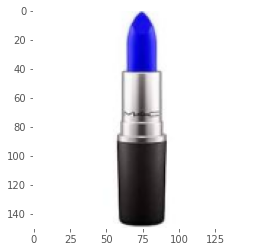

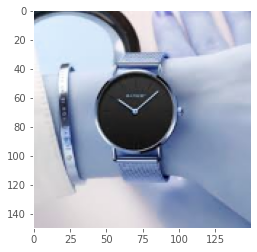

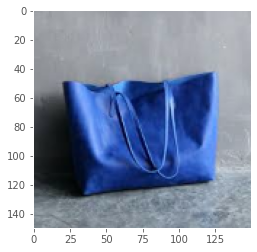

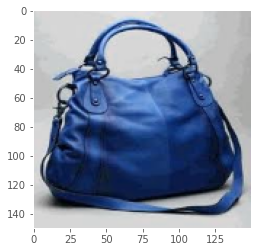

man


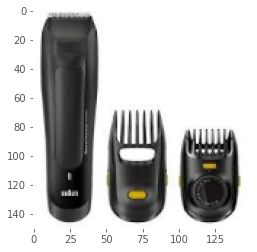

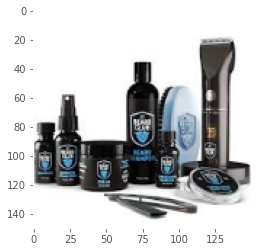

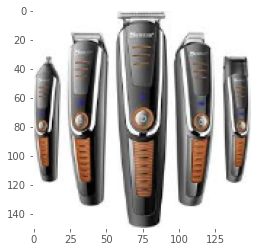

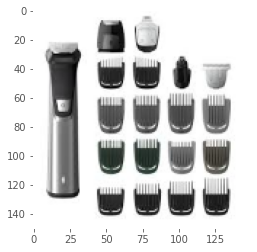

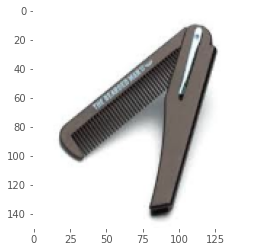

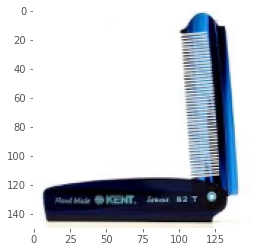

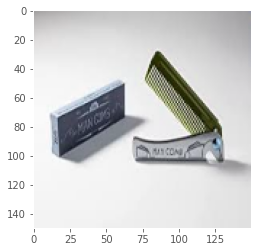

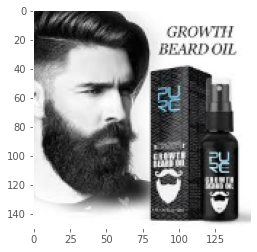

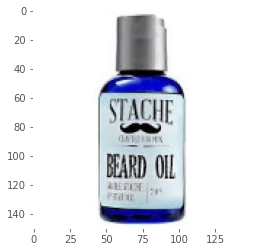

man


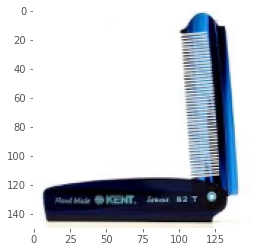

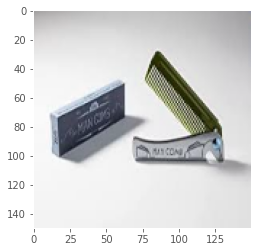

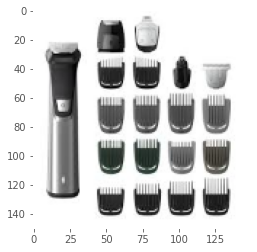

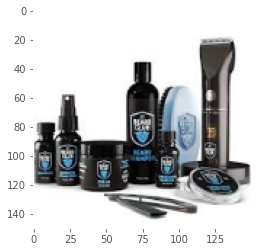

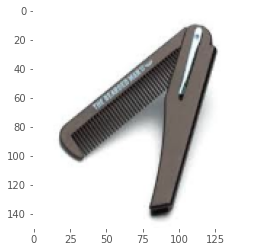

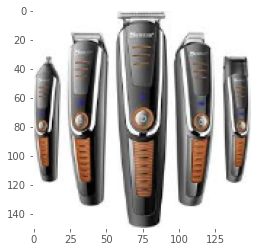

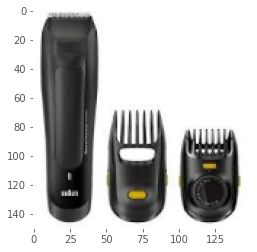

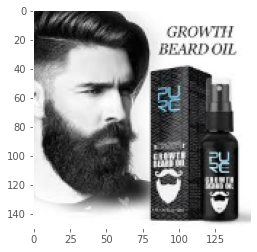

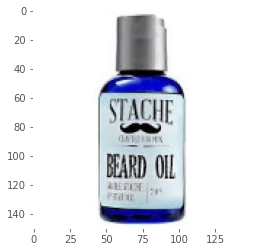

man


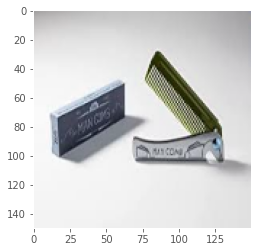

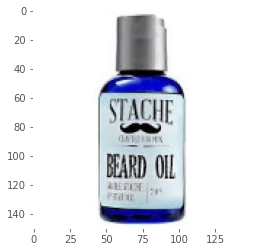

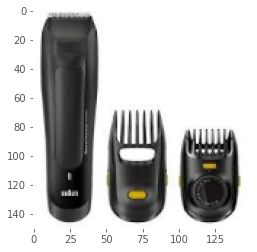

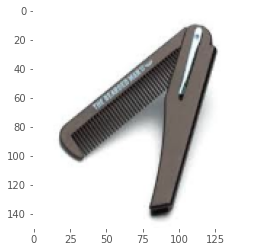

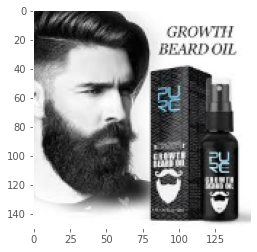

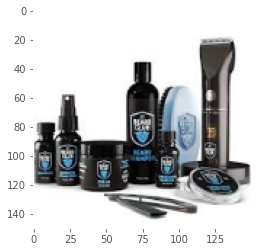

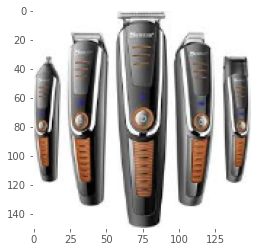

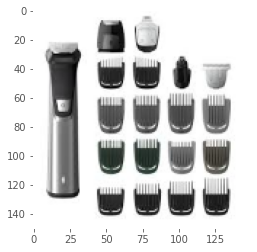

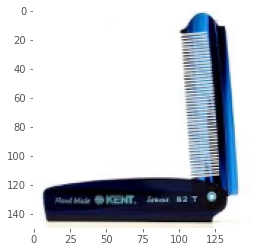

In [30]:
classes = ['man','woman']

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    # apply face detection
    face, confidence = cv.detect_face(frame)


    # loop through detected faces
    for idx, f in enumerate(face):

        # get corner points of face rectangle        
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        # draw rectangle over face
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)

        # crop the detected face region
        face_crop = np.copy(frame[startY:endY,startX:endX])

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        # preprocessing for gender detection model
        face_crop = cv2.resize(face_crop, (96,96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        # apply gender detection on face
        conf = model.predict(face_crop)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]

        # get label with max accuracy
        idx = np.argmax(conf)
        label = classes[idx]
        gender = label
        label = f"{label}: {conf[idx] * 100:.2f}%"

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # write label and confidence above face rectangle
        cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)
        
        

    # display output
    cv2.imshow("gender detection", frame)
    ShowAd(gender)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# release resources
webcam.release()
cv2.destroyAllWindows()

## Output
Refer the below screenshot of the webcam session.
<br>
The products are displayed accordingly in the above loop.
<br>

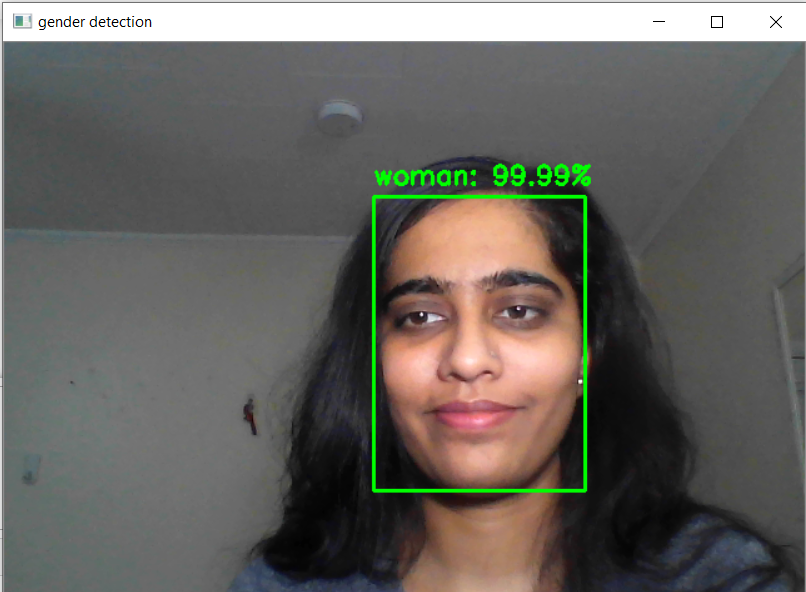

In [27]:
loss, acc = model.evaluate(trainX)
print(f'\nEvaluating the model:\nloss: {loss} \n acc: {acc}')

58/58 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00

Evaluating the model:
loss: 0.0 
 acc: 0.0


# Summary
<ul>
    <li>Concluding the project here, I would like to comment that it was successful. We were able to gather data, build and train the model with accuracy of 99%.</li>
    <li>The hardest part was to gather the data and process it in accordance to the output that we expected. Also, deciding on the number of epochs to train the model was more of a hit and trail.</li>
</ul>